In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import mglearn
from sklearn.cluster import KMeans

#leser fullversjonen av excel-filen
df = pd.read_excel("Engelsberger_full.xlsx", skiprows=[0])
d = df[[0, 3, 5, 10, 30]].dropna()


d.head()



,0,3,5,10,30
0,0.079901,0.746354,0.332938,1.000000,0.058065
1,0.990037,0.602870,0.028353,0.867053,1.000000
2,0.926784,0.908153,0.668234,0.757583,1.000000
3,1.000000,0.498232,0.996924,0.001857,0.559389
4,1.000000,0.914848,0.639969,0.343794,0.657122


In [24]:
#Kilde: jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
#funksjon for å tegne elipser rundt klynger
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [25]:
#Klide: jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
#funksjon for å plassere punkt i et scatter plot
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

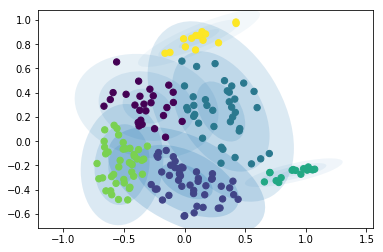

In [26]:
#Bruker gaussian mixture til å clustre data

plot_gmm(GaussianMixture(n_components=6,covariance_type='full',random_state=42 ), PCA(n_components=2).fit_transform(d))

[[ 0.21989767  0.49214268]
 [ 0.11575467 -0.33573627]
 [-0.46523907 -0.20849365]
 [ 0.85687887 -0.24254225]
 [-0.34195732  0.28488064]]


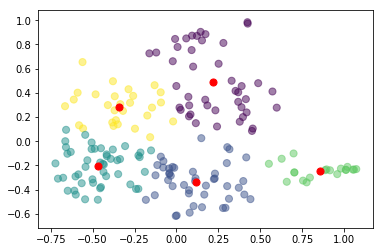

In [27]:
#Reduserer dimensjoner ti 2 og tilpasser dataframen
data = PCA(n_components=2).fit_transform(d)

#bruker K-means til å klynge punktene
kmeans = KMeans(n_clusters=5).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data[:, 0], data[:, 1], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
